In [2]:
#!pip install scikit-plot

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [5]:
df_train = pd.read_csv('train_nolog.csv')

In [6]:
df_train['titleType'].unique()

array(['tvEpisode', 'videoGame', 'movie', 'tvSeries', 'tvMiniSeries',
       'short', 'tvMovie', 'tvSpecial', 'video', 'tvShort'], dtype=object)

In [7]:
# Mappa di raggruppamento
category_mapping = {
    'movie': 'Film',
    'tvMovie': 'Film',
    'short': 'Shorts',
    'tvShort': 'Shorts',
    'tvSeries': 'Serie TV',
    'tvMiniSeries': 'Serie TV',
    'tvEpisode': 'Serie TV',
    'tvSpecial': 'Speciale TV',
    'video': 'Video',
    'videoGame': 'Videogame'
}

# Applicare la mappa al dataframe
df_train['titleType'] = df_train['titleType'].map(category_mapping)


In [8]:
df_train['titleType'].unique()

array(['Serie TV', 'Videogame', 'Film', 'Shorts', 'Speciale TV', 'Video'],
      dtype=object)

tvEpisode    40.220651    MIN 1   MAX 249
videoGame    28.000000    MIN 16  MAX 40
movie        92.740797    MIN 15  MAX 570
tvSeries     50.222818    MIN 1   MAX 540
tvMiniSerie  124.090909   MIN 2   MAX 528
short        13.493827    MIN 0   MAX 44
tvMovie      81.049822    MIN 21  MAX 249
tvSpecial    82.533784    MIN 9   MAX 420
video        71.577778    MIN 1   MAX 384
tvShort      9.3750000    MIN 2   MAX 20

In [9]:
del df_train['originalTitle']
del df_train['rating']
del df_train['genres']
del df_train['countryOfOrigin']
del df_train['isAdult']
del df_train['canHaveEpisodes']

In [10]:
''' Solo se si vogliono usare i generi come etichette
# Dividere i generi in liste
df_train['genres'] = df_train['genres'].str.split(',')

# Espandere i generi in righe separate (es. da Movie1 -> Action|Comedy a Movie1 -> Action, Movie1 -> Comedy )
df_train = df_train.explode('genres').reset_index(drop=True)
'''

" Solo se si vogliono usare i generi come etichette\n# Dividere i generi in liste\ndf_train['genres'] = df_train['genres'].str.split(',')\n\n# Espandere i generi in righe separate (es. da Movie1 -> Action|Comedy a Movie1 -> Action, Movie1 -> Comedy )\ndf_train = df_train.explode('genres').reset_index(drop=True)\n"

In [11]:
X_train = df_train.drop(columns=['titleType'])
y_train = df_train['titleType']

Carichiamo test_nolog e creiamo le variabili

In [12]:
df_test = pd.read_csv('test_nolog.csv')

In [13]:
df_test['titleType'].unique()

array(['video', 'movie', 'tvSpecial', 'tvEpisode', 'tvSeries', 'tvMovie',
       'short', 'videoGame', 'tvMiniSeries', 'tvShort'], dtype=object)

In [14]:
# Mappa di raggruppamento
category_mapping = {
    'movie': 'Film',
    'tvMovie': 'Film',
    'short': 'Shorts',
    'tvShort': 'Shorts',
    'tvSeries': 'Serie TV',
    'tvMiniSeries': 'Serie TV',
    'tvEpisode': 'Serie TV',
    'tvSpecial': 'Speciale TV',
    'video': 'Video',
    'videoGame': 'Videogame'
}

# Applicare la mappa al dataframe
df_test['titleType'] = df_test['titleType'].map(category_mapping)

In [15]:
df_test['titleType'].unique()

array(['Video', 'Film', 'Speciale TV', 'Serie TV', 'Shorts', 'Videogame'],
      dtype=object)

In [16]:
del df_test['originalTitle']
del df_test['rating']
del df_test['genres']
del df_test['countryOfOrigin']
del df_test['isAdult']
del df_test['canHaveEpisodes']

In [17]:
''' Solo se si vogliono usare i generi come etichette
# Dividere i generi in liste
df_test['genres'] = df_test['genres'].str.split(',')

# Espandere i generi in righe separate (es. da Movie1 -> Action|Comedy a Movie1 -> Action, Movie1 -> Comedy )
df_test = df_test.explode('genres').reset_index(drop=True)
'''

" Solo se si vogliono usare i generi come etichette\n# Dividere i generi in liste\ndf_test['genres'] = df_test['genres'].str.split(',')\n\n# Espandere i generi in righe separate (es. da Movie1 -> Action|Comedy a Movie1 -> Action, Movie1 -> Comedy )\ndf_test = df_test.explode('genres').reset_index(drop=True)\n"

In [18]:
X_test = df_test.drop(columns=['titleType'])
y_test = df_test['titleType']

### Normalization

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [20]:
norm = MinMaxScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
X_train_norm.shape

(15925, 11)

In [59]:
clf = KNeighborsClassifier(n_neighbors=126, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=126)

In [60]:
#predizione dei valori
y_test_pred = clf.predict(X_test_norm)
y_test_pred

array(['Shorts', 'Film', 'Film', ..., 'Film', 'Serie TV', 'Shorts'],
      dtype=object)

In [61]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.8121120932856875


In [62]:
# score: Return the mean accuracy on the given test data and labels.
clf.score(X_test_norm, y_test)

0.8121120932856875

In [71]:
# Sarebbe la f-measure (controlla la tabella nelle notes)
print("F1:", f1_score(y_test, y_test_pred, average="macro"))
print("F1:", f1_score(y_test, y_test_pred, average="micro"))
print("F1:", f1_score(y_test, y_test_pred, labels=[1], average="micro"))
print("F1:", f1_score(y_test, y_test_pred, labels=[1], average="macro"))

F1: 0.4239354424023654
F1: 0.8121120932856875
F1: 0.0
F1: 0.0


C:\Users\alban\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alban\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [64]:
print(classification_report(y_test, y_test_pred))

C:\Users\alban\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        Film       0.79      0.93      0.86      2092
    Serie TV       0.83      0.85      0.84      2084
      Shorts       0.81      0.76      0.79       770
 Speciale TV       0.00      0.00      0.00        46
       Video       0.70      0.03      0.06       242
   Videogame       0.00      0.00      0.00        83

    accuracy                           0.81      5317
   macro avg       0.52      0.43      0.42      5317
weighted avg       0.79      0.81      0.78      5317



C:\Users\alban\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alban\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


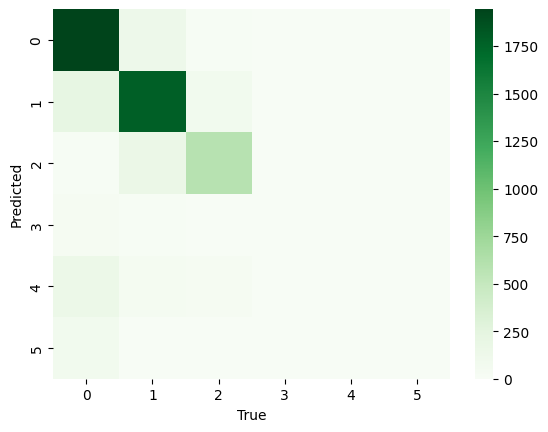

In [65]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=False, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [ ]:
# Return probability estimates for the test data X.
y_test_pred_proba = clf.predict_proba(X_test_norm)
y_test_pred_proba[0:10]

array([[0.01587302, 0.38095238, 0.53968254, 0.        , 0.06349206,
        0.        ],
       [0.80952381, 0.03174603, 0.        , 0.02380952, 0.13492063,
        0.        ],
       [0.79365079, 0.08730159, 0.        , 0.05555556, 0.06349206,
        0.        ],
       [0.03968254, 0.92063492, 0.03174603, 0.00793651, 0.        ,
        0.        ],
       [0.70634921, 0.03968254, 0.        , 0.01587302, 0.23809524,
        0.        ],
       [0.9047619 , 0.08730159, 0.        , 0.00793651, 0.        ,
        0.        ],
       [0.11111111, 0.78571429, 0.08730159, 0.00793651, 0.        ,
        0.00793651],
       [0.95238095, 0.04761905, 0.        , 0.        , 0.        ,
        0.        ],
       [0.94444444, 0.        , 0.        , 0.        , 0.05555556,
        0.        ],
       [0.82539683, 0.02380952, 0.        , 0.01587302, 0.13492063,
        0.        ]])

In [72]:
# Ora, visto che le label sono più di 2, possiamo solo fare una ROC curve per ogni label vs the rest, con il metodo one-vs-the rest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


In [75]:
# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza Y_test
y_test_binarized = label_binarize(y_test, classes=classes)

y_test_binarized


array([[0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

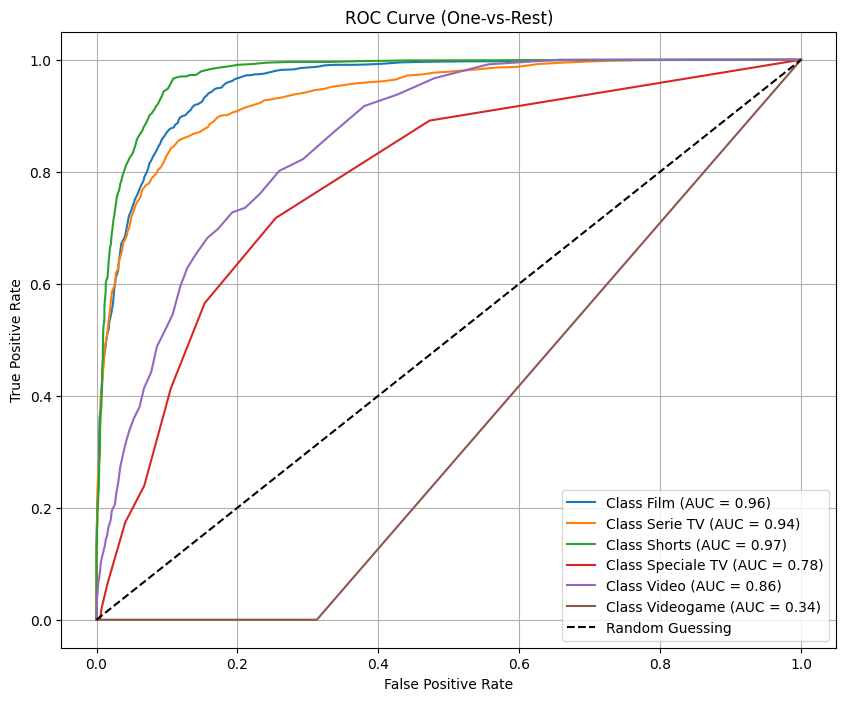

In [77]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend(loc="best")
plt.grid()
plt.show()


In [84]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_test_pred_proba, multi_class="ovr", average="macro")

np.float64(0.8088806827625192)

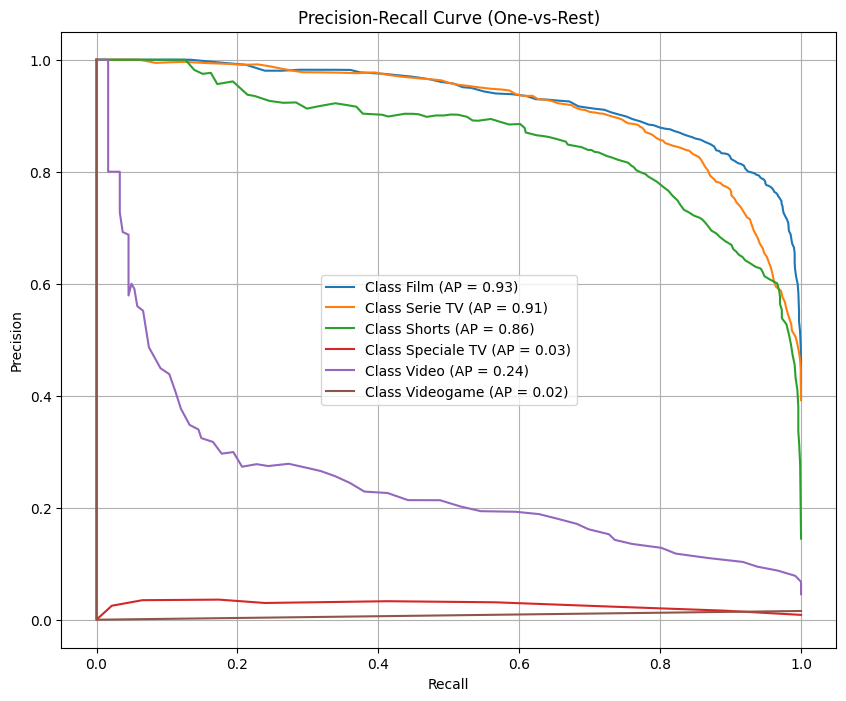

In [88]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (One-vs-Rest)")
plt.legend(loc="best")
plt.grid()
plt.show()